In [3]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
import yfinance as yf

In [5]:
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [6]:
PG= wb.get_data_yahoo("PG", start="1995-1-1")

[*********************100%%**********************]  1 of 1 completed


In [7]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.529935,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.469577,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.363945,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.379034,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.348855,1795200


In [8]:
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-09,166.630005,166.759995,165.139999,165.660004,165.660004,4393100
2024-07-10,165.899994,166.919998,165.539993,166.800003,166.800003,5037100
2024-07-11,166.300003,166.630005,164.779999,165.539993,165.539993,5831500
2024-07-12,166.220001,167.639999,166.020004,166.610001,166.610001,4682400
2024-07-15,166.470001,166.615005,164.470001,164.580002,164.580002,4469621


Simple Rate Return:
P1 - P0/P0 = P1/P0 -1

In [9]:
PG['simple_return']=(PG['Adj Close'] / PG['Adj Close'].shift()) - 1
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2024-07-09   -0.005165
2024-07-10    0.006882
2024-07-11   -0.007554
2024-07-12    0.006464
2024-07-15   -0.012184
Name: simple_return, Length: 7434, dtype: float64


Parte II

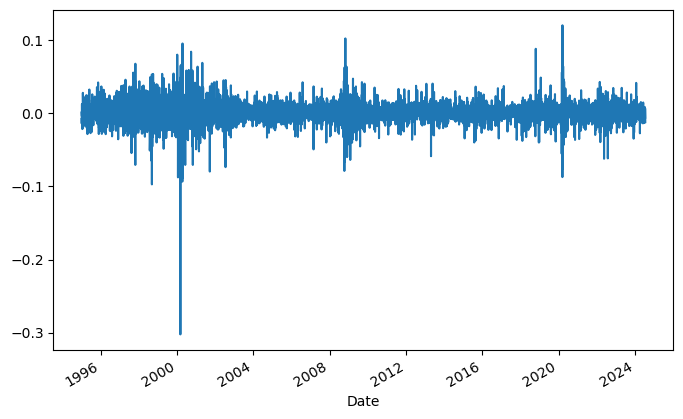

In [10]:
PG['simple_return'].plot(figsize=(8, 5))
plt.show() # Nem precisou do plt.show()

In [11]:
# mean() - Calcula a taxa de retorno média diária
avg_returns_d=PG['simple_return'].mean()
avg_returns_d
# Este calcula está diluido em 365 dia ao invés de
# Apenas os dias de operação da bolsa que não
# Contabiliza os dias de semana, feriados etc

0.0005119327857621134

In [12]:
# Calculo certo considerando apenas os dias de
# Operação
avg_returns_a= PG['simple_return'].mean() * 250
avg_returns_a

0.12798319644052833

In [13]:
# Tratamento do valor extraído
print(str(round(avg_returns_a, 5) * 100) + ' %')

12.798000000000002 %


Calculando a Taxa de Retorno de um Ativo(Logarítmico)

Log Returns:

In(Pt/Pt-1)

In [14]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.529935,3318400,NaN
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.469577,2218800,-0.008016
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.363945,2319600,-0.014142
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.379034,3438000,0.002049
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.348855,1795200,-0.004090


In [15]:
PG['log_return']= np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2024-07-09   -0.005178
2024-07-10    0.006858
2024-07-11   -0.007583
2024-07-12    0.006443
2024-07-15   -0.012259
Name: log_return, Length: 7434, dtype: float64


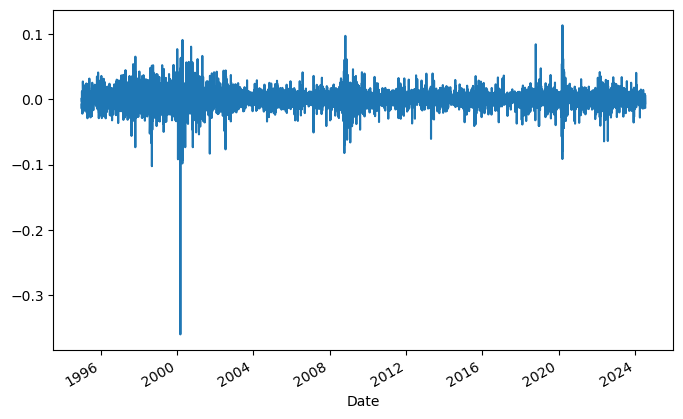

In [16]:
PG['log_return'].plot(figsize=(8, 5))
plt.show()

In [17]:
# Retorno Diário
log_return_d=PG['log_return'].mean()
log_return_d

0.0004149751636202238

In [18]:
# Retorno Anual
log_return_a= PG['log_return'].mean() * 250
log_return_a

0.10374379090505595

In [19]:
print(str(round(log_return_a, 5) * 100) + '%')

10.374%
